In [ ]:
import torch
import math
import matplotlib.pyplot as plt
import sys
import os

from PIL import Image
from diffusers import FluxPipeline
from torch import Tensor
from torchvision import transforms

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

DTYPE = torch.bfloat16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = FluxPipeline.from_pretrained("/root/autodl-tmp/Flux-dev", torch_dtype=DTYPE)
pipe.to(device)
print(f"Loaded pipeline to device {device}")

In [11]:
from models.flux_dev import FluxWrapper, unpack_and_decode
from rectified_flow.rectified_flow import RectifiedFlow

height = 1024
width = 1024

flux_model = FluxWrapper(
    pipeline=pipe,
    height=height,
    width=width,
    dtype=DTYPE,
    device=device,
)

generator = torch.Generator(device=device).manual_seed(0)
X_0 = flux_model.prepare_packed_latents(batch_size=1)
time_grid = flux_model.prepare_time_grid(num_steps=50)


rf_func = RectifiedFlow(
    data_shape=X_0.shape,
    model=flux_model,
    interp="straight",
    device=device,
	dtype=DTYPE,
)

rf_func.sample_source_distribution = flux_model.prepare_packed_latents

VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])


Current time: 0.0000
Current time: 0.0064
Current time: 0.0130
Current time: 0.0198
Current time: 0.0268
Current time: 0.0340
Current time: 0.0414
Current time: 0.0490
Current time: 0.0569
Current time: 0.0650
Current time: 0.0734
Current time: 0.0820
Current time: 0.0909
Current time: 0.1001
Current time: 0.1096
Current time: 0.1195
Current time: 0.1297
Current time: 0.1402
Current time: 0.1512
Current time: 0.1625
Current time: 0.1743
Current time: 0.1865
Current time: 0.1992
Current time: 0.2124
Current time: 0.2262
Current time: 0.2405
Current time: 0.2554
Current time: 0.2710
Current time: 0.2872
Current time: 0.3042
Current time: 0.3220
Current time: 0.3406
Current time: 0.3602
Current time: 0.3807
Current time: 0.4022
Current time: 0.4249
Current time: 0.4488
Current time: 0.4740
Current time: 0.5007
Current time: 0.5289
Current time: 0.5588
Current time: 0.5906
Current time: 0.6244
Current time: 0.6604
Current time: 0.6990
Current time: 0.7402
Current time: 0.7845
Current time:

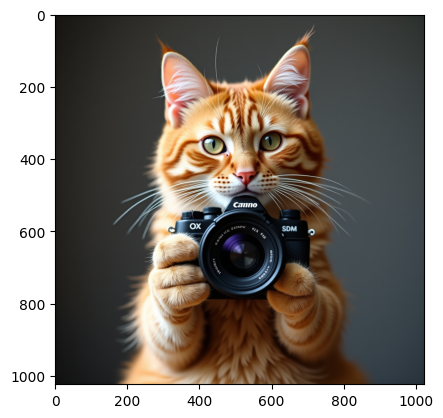

In [10]:
from rectified_flow.samplers import EulerSampler

def print_time_callback(sampler): # demo callback function
    """A callback function to print the current time t."""
    print(f"Current time: {sampler.t:.4f}")
    
my_callback = [print_time_callback]

euler_sampler = EulerSampler(
    rectified_flow=rf_func,
    callbacks=my_callback,
)

euler_sampler.sample_loop(
    X_0=X_0,
    time_grid=time_grid,
    prompt="A photo of a cat holding a camera",
    guidance_scale=3.5,
)

X_1_packed_latent = euler_sampler.trajectories[-1]
X_1_packed_latent = X_1_packed_latent.clone().to(device=device, dtype=DTYPE)
print(X_1_packed_latent.shape)

img = unpack_and_decode(pipe, X_1_packed_latent, height, width)

plt.imshow(img)

/root/rectified-flow/models/flux_dev.py:121: UserWarning: X_t was moved to the device cuda of the FluxWrapper.
  warnings.warn(f"X_t was moved to the device {self.device} of the FluxWrapper.")


Prompt A photo of a cat holding a camera encoded.
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0000
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0064
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0130
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0198
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0268
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([

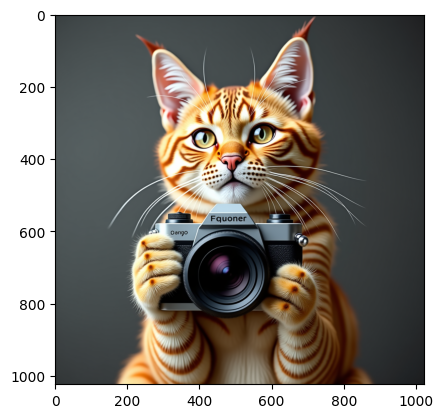

In [12]:
from rectified_flow.samplers import NoiseRefreshSampler

noise_refresh_sampler = NoiseRefreshSampler(
    rectified_flow=rf_func,
    callbacks=my_callback,
)

noise_refresh_sampler.sample_loop(
    X_0=X_0,
    time_grid=time_grid,
    prompt="A photo of a cat holding a camera",
    guidance_scale=3.5,
)

X_1_packed_latent = noise_refresh_sampler.trajectories[-1]
X_1_packed_latent = X_1_packed_latent.clone().to(device=device, dtype=DTYPE)
print(X_1_packed_latent.shape)

img = unpack_and_decode(pipe, X_1_packed_latent, height, width)

plt.imshow(img)

VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0000
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0064
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0130
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0198
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0268
VAE compressed shape =  (1, 16, 128, 128)
Packed latents shape =  torch.Size([1, 4096, 64])
Latent image ids shape =  torch.Size([1, 4096, 3])
Current time: 0.0340
VAE compressed s

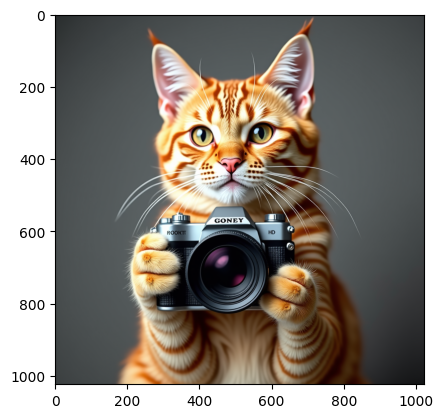

In [14]:
from rectified_flow.samplers import OverShootingSampler

overshoot_sampler = OverShootingSampler(
    rectified_flow=rf_func,
    callbacks=my_callback,
)

overshoot_sampler.sample_loop(
    X_0=X_0,
    time_grid=time_grid,
    prompt="A photo of a cat holding a camera",
    guidance_scale=3.5,
)

X_1_packed_latent = overshoot_sampler.trajectories[-1]
X_1_packed_latent = X_1_packed_latent.clone().to(device=device, dtype=DTYPE)
print(X_1_packed_latent.shape)

img = unpack_and_decode(pipe, X_1_packed_latent, height, width)

plt.imshow(img)